In [1]:
from codecarbon import EmissionsTracker
tracker = EmissionsTracker()
tracker.start()

[codecarbon INFO @ 19:09:58] [setup] RAM Tracking...
[codecarbon INFO @ 19:09:58] [setup] CPU Tracking...
[codecarbon WARNING @ 19:10:01] No CPU tracking mode found. Falling back on CPU constant mode. 
 Mac OS and ARM processor detected: Please enable PowerMetrics sudo to measure CPU

[codecarbon INFO @ 19:10:02] CPU Model on constant consumption mode: Apple M1
[codecarbon INFO @ 19:10:02] [setup] GPU Tracking...
[codecarbon INFO @ 19:10:02] No GPU found.
[codecarbon INFO @ 19:10:02] >>> Tracker's metadata:
[codecarbon INFO @ 19:10:02]   Platform system: macOS-10.16-x86_64-i386-64bit
[codecarbon INFO @ 19:10:02]   Python version: 3.9.12
[codecarbon INFO @ 19:10:02]   CodeCarbon version: 2.8.3
[codecarbon INFO @ 19:10:02]   Available RAM : 8.000 GB
[codecarbon INFO @ 19:10:02]   CPU count: 8
[codecarbon INFO @ 19:10:02]   CPU model: Apple M1
[codecarbon INFO @ 19:10:02]   GPU count: None
[codecarbon INFO @ 19:10:02]   GPU model: None
[codecarbon INFO @ 19:10:05] Saving emissions data to

In [2]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
from sklearn.model_selection import train_test_split


In [3]:

df = pd.read_csv("../training.csv")

# Mostrar columnas disponibles y primeras filas para revisar
print(df.columns)
df.head()

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')


,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

df.replace(-999.0, np.nan, inplace=True)
df.fillna(df.median(), inplace=True)

# Seleccionamos las columnas numéricas útiles
feature_cols = df.columns.difference(['EventId', 'Weight', 'Label'])
X = df[feature_cols]
y = df['Label'].map({'s': 1, 'b': 0})


# División en entrenamiento y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


/var/folders/6p/rj62j_kn3_z770jd73t206640000gn/T/ipykernel_2470/2252016541.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [5]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [6]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predicciones
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidad para clase 1

# Métricas
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
recall_class_1 = report['1']['recall']
f1_class_1 = report['1']['f1-score']
auc = roc_auc_score(y_test, y_proba)

# Resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (clase 1): {recall_class_1:.4f}")
print(f"F1 Score (clase 1): {f1_class_1:.4f}")
print(f"AUC-ROC: {auc:.4f}")


Accuracy: 0.7650
Recall (clase 1): 0.6693
F1 Score (clase 1): 0.6586
AUC-ROC: 0.7417


Probamos distintas alternativas para mejorar el modelo

In [7]:
clf = DecisionTreeClassifier(
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    criterion='entropy',
    random_state=42
)
clf.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [8]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predicciones
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidad para clase 1

# Métricas
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
recall_class_1 = report['1']['recall']
f1_class_1 = report['1']['f1-score']
auc = roc_auc_score(y_test, y_proba)

# Resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (clase 1): {recall_class_1:.4f}")
print(f"F1 Score (clase 1): {f1_class_1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

Accuracy: 0.8045
Recall (clase 1): 0.7393
F1 Score (clase 1): 0.7192
AUC-ROC: 0.8727


Utilizamos GridSearchCV para mejorar aún más nuestro moodelo

In [9]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}


In [10]:
dt = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)


[codecarbon INFO @ 19:10:20] Energy consumed for RAM : 0.000013 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:10:20] Energy consumed for all CPUs : 0.000021 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:10:20] 0.000033 kWh of electricity used since the beginning.


Fitting 5 folds for each of 96 candidates, totalling 480 fits


[codecarbon INFO @ 19:10:35] Energy consumed for RAM : 0.000025 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:10:36] Energy consumed for all CPUs : 0.000042 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:10:36] 0.000067 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:10:50] Energy consumed for RAM : 0.000037 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:10:50] Energy consumed for all CPUs : 0.000062 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:10:50] 0.000100 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:11:05] Energy consumed for RAM : 0.000050 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:11:06] Energy consumed for all CPUs : 0.000083 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:11:06] 0.000133 kWh of electricity used since the beginning.
[codecarbon INFO @ 19:11:20] Energy consumed for RAM : 0.000062 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:11:20] Energy consumed for all CPUs : 0.000104 kWh. Total CPU Power : 5.0 W
[codecarbon

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='f1', verbose=1)

In [11]:
print("Mejores parámetros:", grid_search.best_params_)
best_dt = grid_search.best_estimator_

Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 20}


In [12]:
# Predecir y calcular métricas
y_pred = best_dt.predict(X_test)
y_proba = best_dt.predict_proba(X_test)[:, 1]

from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predicciones
y_pred = clf.predict(X_test)
y_proba = clf.predict_proba(X_test)[:, 1]  # Probabilidad para clase 1

# Métricas
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
recall_class_1 = report['1']['recall']
f1_class_1 = report['1']['f1-score']
auc = roc_auc_score(y_test, y_proba)

# Resultados
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (clase 1): {recall_class_1:.4f}")
print(f"F1 Score (clase 1): {f1_class_1:.4f}")
print(f"AUC-ROC: {auc:.4f}")

Accuracy: 0.8045
Recall (clase 1): 0.7393
F1 Score (clase 1): 0.7192
AUC-ROC: 0.8727


In [16]:
# Métricas en entrenamiento
y_train_pred = best_dt.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Train Accuracy: {train_accuracy:.4f}")


Train Accuracy: 0.8315


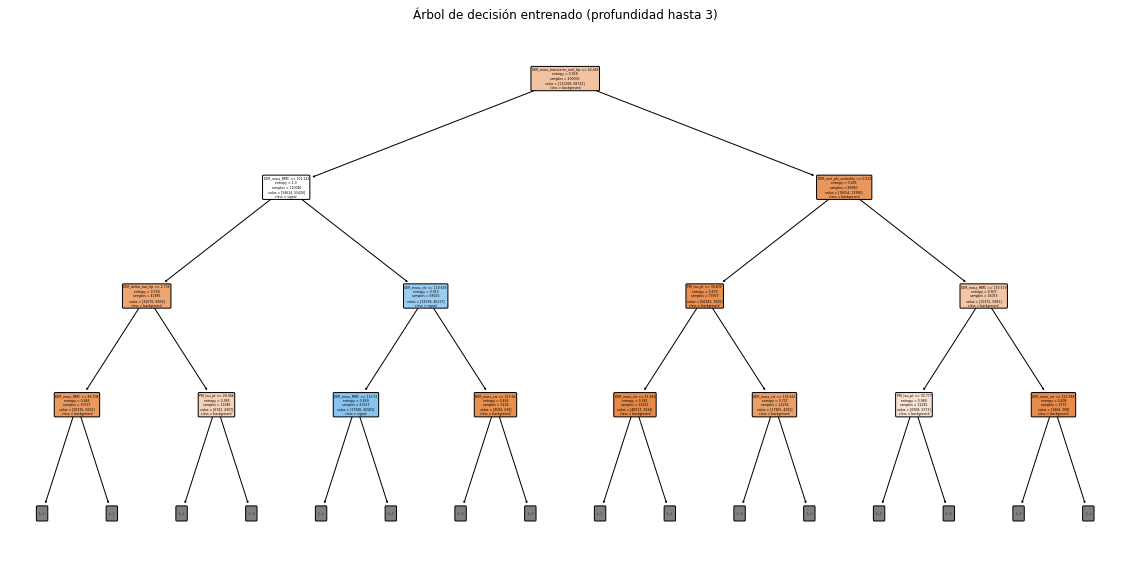

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    best_dt,
    feature_names=feature_cols,
    class_names=['background', 'signal'],
    filled=True,
    rounded=True,
    max_depth=3  # Limita la profundidad visual para no saturar
)
plt.title("Árbol de decisión entrenado (profundidad hasta 3)")
plt.show()
plt.savefig("decision_tree_visualization.png", dpi=300, bbox_inches="tight")


In [14]:
from sklearn.tree import export_text

tree_text = export_text(
    best_dt,
    feature_names=list(feature_cols),
    max_depth=3  # Puedes quitar esto si quieres el árbol completo
)
print(tree_text)


|--- DER_mass_transverse_met_lep <= 52.48
|   |--- DER_mass_MMC <= 101.14
|   |   |--- DER_deltar_tau_lep <= 2.74
|   |   |   |--- DER_mass_MMC <= 88.71
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- DER_mass_MMC >  88.71
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- DER_deltar_tau_lep >  2.74
|   |   |   |--- PRI_tau_pt <= 28.05
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- PRI_tau_pt >  28.05
|   |   |   |   |--- truncated branch of depth 7
|   |--- DER_mass_MMC >  101.14
|   |   |--- DER_mass_vis <= 119.66
|   |   |   |--- DER_mass_MMC <= 113.55
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- DER_mass_MMC >  113.55
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- DER_mass_vis >  119.66
|   |   |   |--- DER_mass_vis <= 127.66
|   |   |   |   |--- truncated branch of depth 7
|   |   |   |--- DER_mass_vis >  127.66
|   |   |   |   |--- truncated branch of depth 7
|--- DER_mass_transverse_met_lep >  52

In [15]:
emissions = tracker.stop()

[codecarbon INFO @ 19:14:30] Energy consumed for RAM : 0.000220 kWh. RAM Power : 3.0 W
[codecarbon INFO @ 19:14:30] Energy consumed for all CPUs : 0.000367 kWh. Total CPU Power : 5.0 W
[codecarbon INFO @ 19:14:30] 0.000587 kWh of electricity used since the beginning.
